# Bayesian Sampler Examples

Examples of running each sampler avaiable in 3ML.


Before, that, let's discuss setting up configuration default sampler with default parameters. We can set in our configuration a default algorithm and default setup parameters for the samplers. This can ease fitting when we are doing exploratory data analysis.

With any of the samplers, you can pass keywords to access their setups. Read each pacakges documentation for more details.


In [1]:
from threeML import *
from threeML.plugins.XYLike import XYLike

import numpy as np
import dynesty
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
silence_warnings()
set_threeML_style()

21:45:08 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=22701;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=249871;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#48\48]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=999842;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=431944;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#69\69]8;;\
                  will not be available.                                                                           

21:45:09 WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=26436;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=627236;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#33\33]8;;\
                  available                                                                                        

In [2]:
threeML_config.bayesian.default_sampler

<Sampler.emcee: 'emcee'>

In [3]:
threeML_config.bayesian.emcee_setup

{'n_burnin': None, 'n_iterations': 500, 'n_walkers': 50, 'seed': 5123}

If you simply run `bayes_analysis.sample()` the default sampler and its default parameters will be used.


Let's make some data to fit.

21:45:10 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=239857;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=831825;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

21:45:11 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=130452;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=387463;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

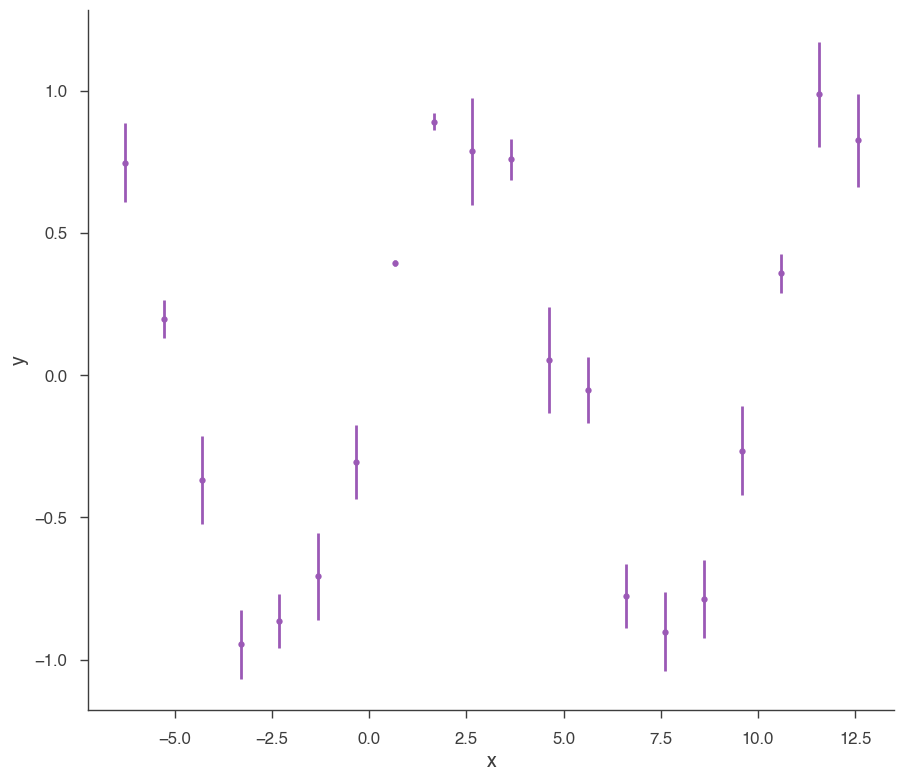

In [4]:
sin = Sin(K=1, f=0.1)
sin.phi.fix = True
sin.K.prior = Log_uniform_prior(lower_bound=0.5, upper_bound=1.5)
sin.f.prior = Uniform_prior(lower_bound=0, upper_bound=0.5)

model = Model(PointSource("demo", 0, 0, spectral_shape=sin))

x = np.linspace(-2 * np.pi, 4 * np.pi, 20)
yerr = np.random.uniform(0.01, 0.2, 20)


xyl = XYLike.from_function("demo", sin, x, yerr)
xyl.plot()

bayes_analysis = BayesianAnalysis(model, DataList(xyl))

## emcee

         INFO      sampler set to emcee                                                    ]8;id=97480;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=327260;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

21:45:15 INFO      Mean acceptance fraction: 0.7159000000000001                                ]8;id=28971;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=510768;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py#157\157]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=142197;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=476265;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=135251;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=92357;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.87 -0.19 +0.21) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.98 +/- 0.08) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-8.54044
total,-8.54044


Values of statistical measures:

,statistical measures
AIC,21.786762
BIC,23.072344
DIC,21.060372
PDIC,1.988813


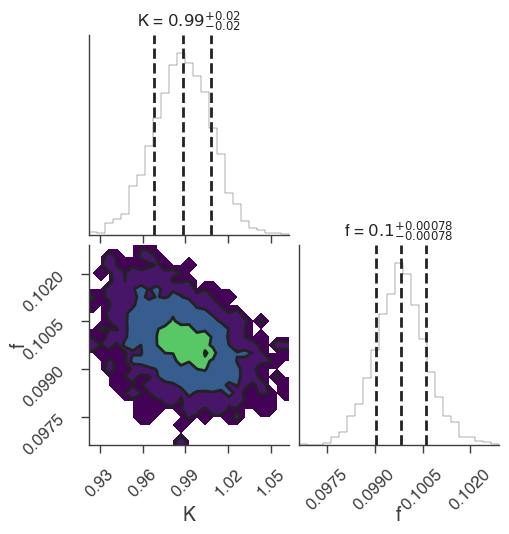

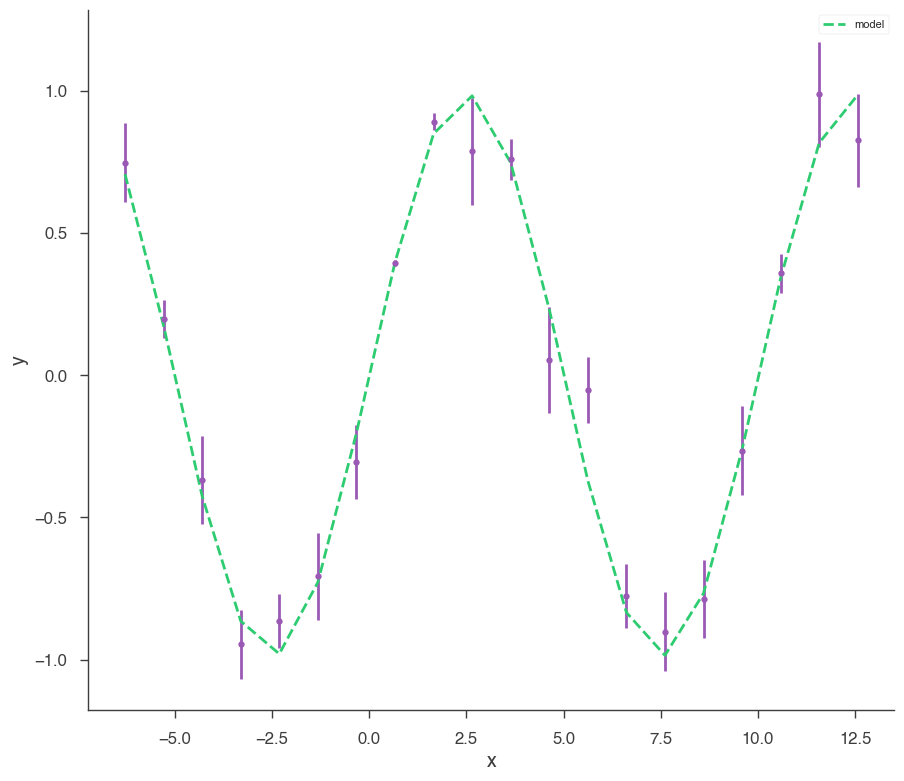

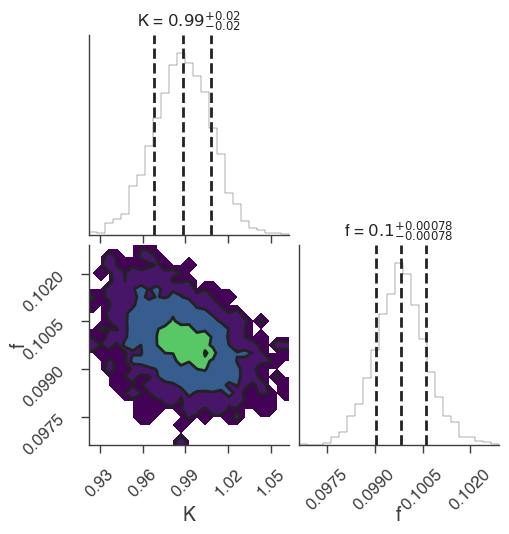

In [5]:
bayes_analysis.set_sampler("emcee")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## multinest

21:45:16 INFO      sampler set to multinest                                                ]8;id=990160;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=581860;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    2
 *****************************************************


  analysing data from chains/fit-.txt ln(ev)=  -17.278307563785837      +/-  0.13905533195023614     
 Total Likelihood Evaluations:         5204
 Sampling finished. Exiting MultiNest



21:45:18 INFO      fit restored to maximum of posterior                                         ]8;id=896886;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=397540;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=362344;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=172930;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.88 -0.21 +0.20) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.98 -0.08 +0.09) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-8.540817
total,-8.540817


Values of statistical measures:

,statistical measures
AIC,21.787516
BIC,23.073098
DIC,20.956125
PDIC,1.936269
log(Z),-7.503874


         INFO      deleting the chain directory chains                                     ]8;id=250418;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py\multinest_sampler.py]8;;\:]8;id=577137;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py#255\255]8;;\

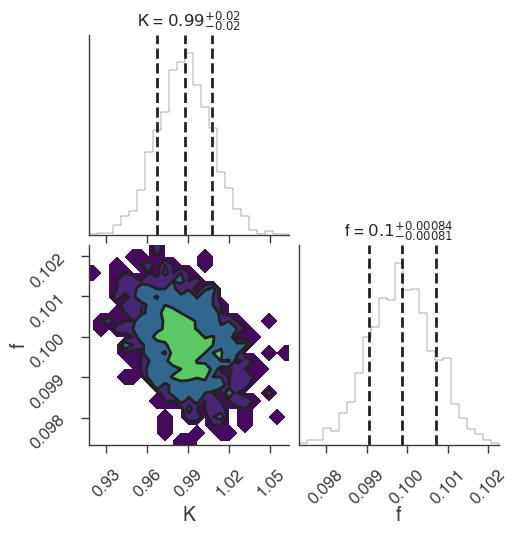

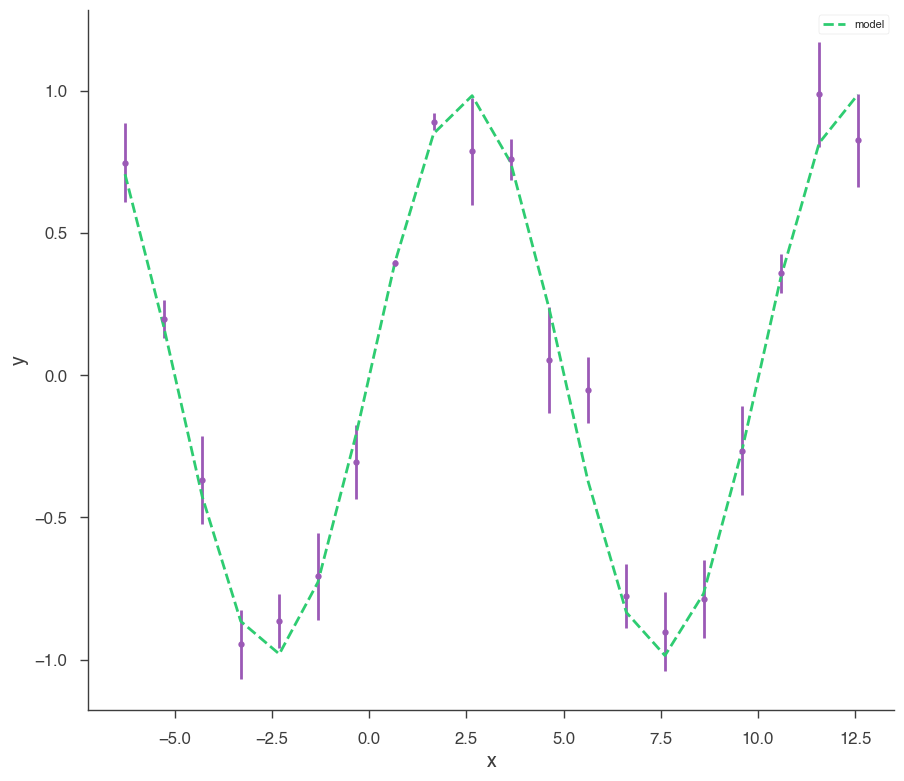

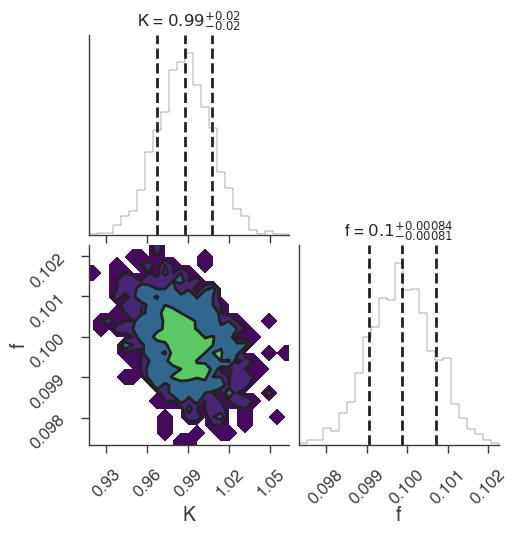

In [6]:
bayes_analysis.set_sampler("multinest")
bayes_analysis.sampler.setup(n_live_points=400, resume=False, auto_clean=True)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## dynesty

         INFO      sampler set to dynesty_nested                                           ]8;id=292349;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=570045;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

205it [00:00, 2044.09it/s, bound: 0 | nc: 2 | ncall: 677 | eff(%): 30.281 | loglstar:   -inf < -1832.664 <    inf | logz: -1839.860 +/-  0.134 | dlogz: 1853.959 >  0.409]

410it [00:00, 1706.59it/s, bound: 0 | nc: 4 | ncall: 1097 | eff(%): 37.375 | loglstar:   -inf < -1040.010 <    inf | logz: -1047.591 +/-  0.134 | dlogz: 1032.338 >  0.409]

585it [00:00, 1503.28it/s, bound: 0 | nc: 2 | ncall: 1671 | eff(%): 35.009 | loglstar:   -inf < -737.141 <    inf | logz: -744.524 +/-  0.130 | dlogz: 730.721 >  0.409]   

739it [00:00, 1219.11it/s, bound: 0 | nc: 3 | ncall: 2529 | eff(%): 29.221 | loglstar:   -inf < -576.050 <    inf | logz: -583.196 +/-  0.124 | dlogz: 569.996 >  0.409]

868it [00:00, 1042.45it/s, bound: 0 | nc: 6 | ncall: 3265 | eff(%): 26.585 | loglstar:   -inf < -493.763 <    inf | logz: -500.953 +/-  0.130 | dlogz: 490.412 >  0.409]

978it [00:00, 968.52it/s, bound: 0 | nc: 18 | ncall: 4121 | eff(%): 23.732 | loglstar:   -inf < -397.086 <    inf | logz: -404.550 +/-  0.131 | dlogz: 393.741 >  0.409]

1078it [00:01, 744.44it/s, bound: 0 | nc: 1 | ncall: 5402 | eff(%): 19.956 | loglstar:   -inf < -327.714 <    inf | logz: -335.316 +/-  0.134 | dlogz: 324.192 >  0.409]

1160it [00:01, 666.88it/s, bound: 0 | nc: 8 | ncall: 6635 | eff(%): 17.483 | loglstar:   -inf < -279.847 <    inf | logz: -289.361 +/-  0.152 | dlogz: 280.633 >  0.409]

1232it [00:01, 527.63it/s, bound: 0 | nc: 22 | ncall: 8136 | eff(%): 15.143 | loglstar:   -inf < -247.956 <    inf | logz: -255.609 +/-  0.131 | dlogz: 243.940 >  0.409]

1291it [00:01, 485.44it/s, bound: 0 | nc: 12 | ncall: 8885 | eff(%): 14.530 | loglstar:   -inf < -221.310 <    inf | logz: -229.540 +/-  0.135 | dlogz: 217.879 >  0.409]

1344it [00:01, 382.05it/s, bound: 0 | nc: 1 | ncall: 10284 | eff(%): 13.069 | loglstar:   -inf < -198.016 <    inf | logz: -206.288 +/-  0.135 | dlogz: 194.416 >  0.409]

1387it [00:02, 316.18it/s, bound: 0 | nc: 23 | ncall: 11723 | eff(%): 11.831 | loglstar:   -inf < -183.519 <    inf | logz: -192.069 +/-  0.135 | dlogz: 180.095 >  0.409]

1423it [00:02, 297.50it/s, bound: 0 | nc: 43 | ncall: 12514 | eff(%): 11.371 | loglstar:   -inf < -171.227 <    inf | logz: -179.773 +/-  0.136 | dlogz: 167.775 >  0.409]

1455it [00:02, 294.87it/s, bound: 0 | nc: 23 | ncall: 13137 | eff(%): 11.076 | loglstar:   -inf < -163.602 <    inf | logz: -171.776 +/-  0.137 | dlogz: 159.560 >  0.409]

1486it [00:02, 272.25it/s, bound: 0 | nc: 6 | ncall: 14090 | eff(%): 10.546 | loglstar:   -inf < -156.503 <    inf | logz: -164.572 +/-  0.135 | dlogz: 152.240 >  0.409] 

1514it [00:02, 249.03it/s, bound: 0 | nc: 58 | ncall: 15022 | eff(%): 10.079 | loglstar:   -inf < -145.979 <    inf | logz: -154.492 +/-  0.140 | dlogz: 142.178 >  0.409]

1540it [00:02, 221.26it/s, bound: 1 | nc: 1 | ncall: 15290 | eff(%): 10.072 | loglstar:   -inf < -137.948 <    inf | logz: -146.820 +/-  0.140 | dlogz: 134.479 >  0.409] 

1707it [00:02, 528.18it/s, bound: 1 | nc: 2 | ncall: 15546 | eff(%): 10.980 | loglstar:   -inf < -96.672 <    inf | logz: -105.112 +/-  0.136 | dlogz: 92.183 >  0.409]  

1846it [00:03, 727.34it/s, bound: 1 | nc: 3 | ncall: 15870 | eff(%): 11.632 | loglstar:   -inf < -70.482 <    inf | logz: -79.376 +/-  0.141 | dlogz: 66.292 >  0.409] 

1934it [00:03, 639.47it/s, bound: 2 | nc: 1 | ncall: 15976 | eff(%): 12.106 | loglstar:   -inf < -57.915 <    inf | logz: -66.256 +/-  0.138 | dlogz: 52.962 >  0.409]

2107it [00:03, 888.61it/s, bound: 2 | nc: 2 | ncall: 16257 | eff(%): 12.961 | loglstar:   -inf < -40.897 <    inf | logz: -49.418 +/-  0.139 | dlogz: 35.673 >  0.409]

2212it [00:03, 745.91it/s, bound: 3 | nc: 1 | ncall: 16475 | eff(%): 13.426 | loglstar:   -inf < -34.516 <    inf | logz: -43.128 +/-  0.137 | dlogz: 29.110 >  0.409]

2403it [00:03, 1001.63it/s, bound: 3 | nc: 2 | ncall: 16739 | eff(%): 14.356 | loglstar:   -inf < -25.461 <    inf | logz: -34.190 +/-  0.139 | dlogz: 19.677 >  0.409]

2553it [00:03, 1120.59it/s, bound: 3 | nc: 1 | ncall: 17031 | eff(%): 14.990 | loglstar:   -inf < -20.989 <    inf | logz: -29.671 +/-  0.139 | dlogz: 14.771 >  0.409]

2682it [00:03, 908.20it/s, bound: 4 | nc: 1 | ncall: 17199 | eff(%): 15.594 | loglstar:   -inf < -17.820 <    inf | logz: -26.650 +/-  0.139 | dlogz: 11.424 >  0.409] 

2857it [00:04, 1094.11it/s, bound: 4 | nc: 2 | ncall: 17479 | eff(%): 16.345 | loglstar:   -inf < -14.673 <    inf | logz: -23.543 +/-  0.140 | dlogz:  7.873 >  0.409]

2986it [00:04, 887.81it/s, bound: 5 | nc: 1 | ncall: 17722 | eff(%): 16.849 | loglstar:   -inf < -13.069 <    inf | logz: -21.952 +/-  0.140 | dlogz:  5.958 >  0.409] 

3167it [00:04, 1081.33it/s, bound: 5 | nc: 4 | ncall: 17988 | eff(%): 17.606 | loglstar:   -inf < -11.304 <    inf | logz: -20.307 +/-  0.141 | dlogz:  3.877 >  0.409]

3297it [00:04, 871.65it/s, bound: 6 | nc: 1 | ncall: 18293 | eff(%): 18.023 | loglstar:   -inf < -10.610 <    inf | logz: -19.529 +/-  0.141 | dlogz:  2.813 >  0.409] 

3473it [00:04, 1050.37it/s, bound: 6 | nc: 3 | ncall: 18552 | eff(%): 18.720 | loglstar:   -inf < -9.835 <    inf | logz: -18.798 +/-  0.141 | dlogz:  1.767 >  0.409]

3618it [00:04, 1135.37it/s, bound: 6 | nc: 9 | ncall: 18866 | eff(%): 19.177 | loglstar:   -inf < -9.450 <    inf | logz: -18.400 +/-  0.141 | dlogz:  1.183 >  0.409]

3751it [00:04, 927.77it/s, bound: 7 | nc: 1 | ncall: 19026 | eff(%): 19.715 | loglstar:   -inf < -9.194 <    inf | logz: -18.139 +/-  0.141 | dlogz:  0.812 >  0.409] 

3919it [00:05, 1087.57it/s, bound: 7 | nc: 1 | ncall: 19325 | eff(%): 20.279 | loglstar:   -inf < -8.992 <    inf | logz: -17.915 +/-  0.141 | dlogz:  0.505 >  0.409]

3995it [00:05, 750.61it/s, +400 | bound: 8 | nc: 1 | ncall: 19886 | eff(%): 22.555 | loglstar:   -inf < -8.553 <    inf | logz: -17.491 +/-  0.141 | dlogz:  0.001 >  0.409]

21:45:24 INFO      fit restored to maximum of posterior                                         ]8;id=418806;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=460890;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=695191;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=983010;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.87 +/- 0.20) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.98 +/- 0.08) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-8.540415
total,-8.540415


Values of statistical measures:

,statistical measures
AIC,21.786712
BIC,23.072294
DIC,21.058197
PDIC,1.988658
log(Z),-7.596459


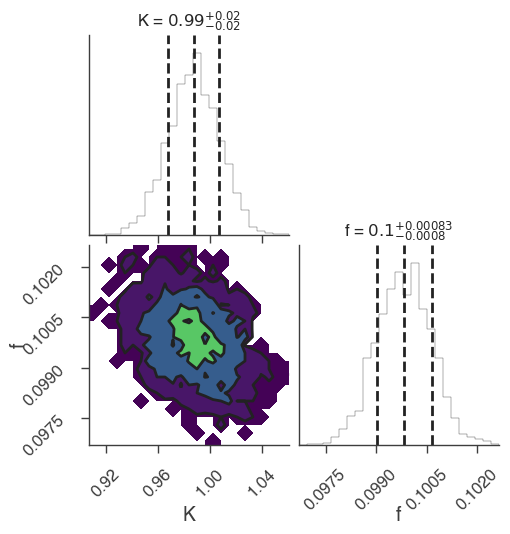

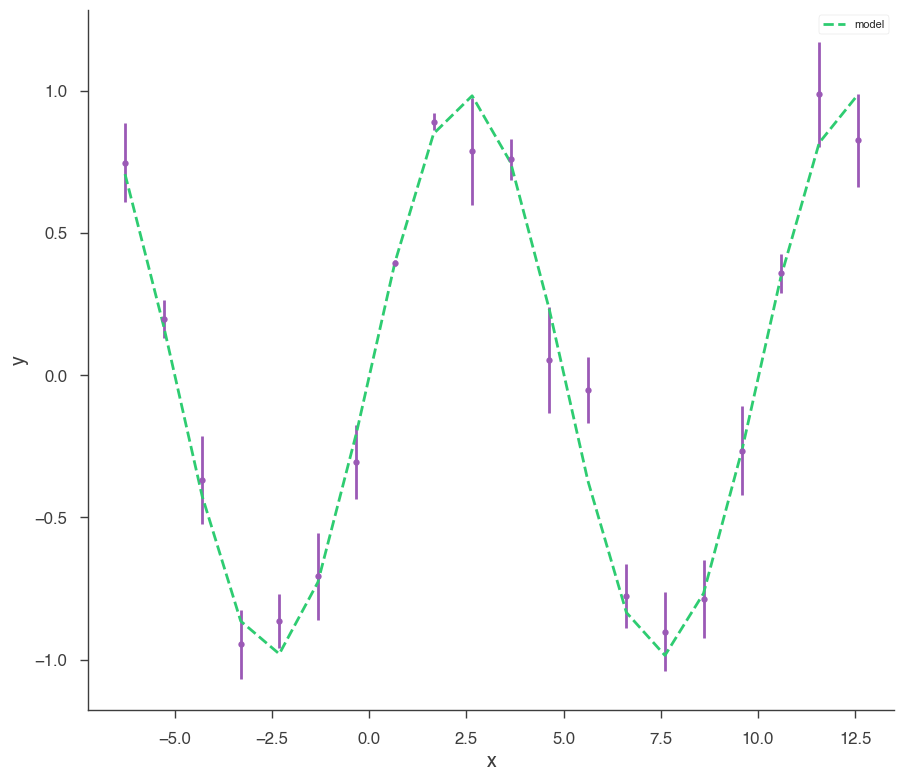

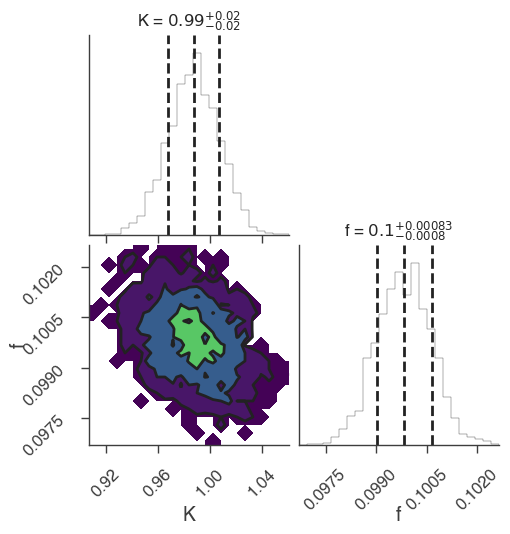

In [7]:
bayes_analysis.set_sampler("dynesty_nested")
bayes_analysis.sampler.setup(n_live_points=400)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

21:45:25 INFO      sampler set to dynesty_dynamic                                          ]8;id=224812;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=285457;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

79it [00:00, 787.37it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 86 | eff(%): 13.481 | loglstar:   -inf < -4171.392 <    inf | logz: -4178.457 +/-  0.119 | dlogz: 4124.222 >  0.010]

268it [00:00, 1430.98it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 339 | eff(%): 31.943 | loglstar:   -inf < -1696.063 <    inf | logz: -1703.502 +/-  0.122 | dlogz: 1645.886 >  0.010]

412it [00:00, 1416.10it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 624 | eff(%): 36.655 | loglstar:   -inf < -1243.583 <    inf | logz: -1250.377 +/-  0.115 | dlogz: 1193.913 >  0.010]

554it [00:00, 1331.73it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 988 | eff(%): 37.231 | loglstar:   -inf < -935.948 <    inf | logz: -943.291 +/-  0.115 | dlogz: 933.238 >  0.010]   

688it [00:00, 1224.62it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 1431 | eff(%): 35.629 | loglstar:   -inf < -786.994 <    inf | logz: -793.843 +/-  0.111 | dlogz: 782.950 >  0.010]

812it [00:00, 1053.22it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 2005 | eff(%): 32.415 | loglstar:   -inf < -674.054 <    inf | logz: -681.001 +/-  0.114 | dlogz: 671.068 >  0.010]

922it [00:00, 875.68it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 2749 | eff(%): 28.378 | loglstar:   -inf < -586.222 <    inf | logz: -594.038 +/-  0.119 | dlogz: 584.365 >  0.010] 

1016it [00:01, 775.98it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 3448 | eff(%): 25.735 | loglstar:   -inf < -534.161 <    inf | logz: -541.795 +/-  0.114 | dlogz: 531.500 >  0.010]

1099it [00:01, 724.71it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 4079 | eff(%): 24.001 | loglstar:   -inf < -482.508 <    inf | logz: -490.185 +/-  0.116 | dlogz: 479.713 >  0.010]

1175it [00:01, 659.23it/s, batch: 0 | bound: 0 | nc: 38 | ncall: 4821 | eff(%): 22.082 | loglstar:   -inf < -416.518 <    inf | logz: -425.337 +/-  0.126 | dlogz: 415.589 >  0.010]

1244it [00:01, 573.95it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 5684 | eff(%): 20.116 | loglstar:   -inf < -352.737 <    inf | logz: -361.282 +/-  0.126 | dlogz: 351.064 >  0.010] 

1304it [00:01, 568.30it/s, batch: 0 | bound: 0 | nc: 12 | ncall: 6311 | eff(%): 19.145 | loglstar:   -inf < -320.259 <    inf | logz: -328.625 +/-  0.118 | dlogz: 317.755 >  0.010]

1363it [00:01, 505.94it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 7161 | eff(%): 17.791 | loglstar:   -inf < -290.410 <    inf | logz: -298.484 +/-  0.122 | dlogz: 287.449 >  0.010] 

1416it [00:01, 445.64it/s, batch: 0 | bound: 0 | nc: 64 | ncall: 8211 | eff(%): 16.255 | loglstar:   -inf < -261.785 <    inf | logz: -269.651 +/-  0.120 | dlogz: 258.313 >  0.010]

1463it [00:02, 392.83it/s, batch: 0 | bound: 0 | nc: 6 | ncall: 8969 | eff(%): 15.450 | loglstar:   -inf < -246.773 <    inf | logz: -254.658 +/-  0.118 | dlogz: 243.251 >  0.010] 

1504it [00:02, 376.45it/s, batch: 0 | bound: 0 | nc: 14 | ncall: 9755 | eff(%): 14.666 | loglstar:   -inf < -233.271 <    inf | logz: -240.741 +/-  0.117 | dlogz: 229.112 >  0.010]

1543it [00:02, 326.19it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 10565 | eff(%): 13.945 | loglstar:   -inf < -218.145 <    inf | logz: -226.388 +/-  0.121 | dlogz: 214.798 >  0.010]

1577it [00:02, 311.84it/s, batch: 0 | bound: 0 | nc: 6 | ncall: 11152 | eff(%): 13.534 | loglstar:   -inf < -207.417 <    inf | logz: -215.435 +/-  0.120 | dlogz: 203.726 >  0.010]

1609it [00:02, 312.95it/s, batch: 0 | bound: 0 | nc: 26 | ncall: 11794 | eff(%): 13.088 | loglstar:   -inf < -195.622 <    inf | logz: -203.798 +/-  0.120 | dlogz: 192.037 >  0.010]

1641it [00:02, 301.22it/s, batch: 0 | bound: 0 | nc: 50 | ncall: 12471 | eff(%): 12.651 | loglstar:   -inf < -186.260 <    inf | logz: -194.128 +/-  0.118 | dlogz: 182.230 >  0.010]

1672it [00:02, 296.81it/s, batch: 0 | bound: 0 | nc: 8 | ncall: 13167 | eff(%): 12.234 | loglstar:   -inf < -174.529 <    inf | logz: -182.882 +/-  0.123 | dlogz: 171.036 >  0.010] 

1702it [00:02, 261.23it/s, batch: 0 | bound: 0 | nc: 10 | ncall: 14251 | eff(%): 11.538 | loglstar:   -inf < -166.419 <    inf | logz: -174.131 +/-  0.119 | dlogz: 162.076 >  0.010]

1729it [00:03, 256.89it/s, batch: 0 | bound: 0 | nc: 49 | ncall: 15081 | eff(%): 11.097 | loglstar:   -inf < -159.209 <    inf | logz: -167.227 +/-  0.122 | dlogz: 155.161 >  0.010]

1756it [00:03, 196.52it/s, batch: 0 | bound: 0 | nc: 23 | ncall: 16313 | eff(%): 10.444 | loglstar:   -inf < -151.486 <    inf | logz: -159.603 +/-  0.121 | dlogz: 147.491 >  0.010]

1778it [00:03, 191.43it/s, batch: 0 | bound: 0 | nc: 22 | ncall: 16922 | eff(%): 10.205 | loglstar:   -inf < -146.771 <    inf | logz: -155.189 +/-  0.120 | dlogz: 143.064 >  0.010]

1799it [00:03, 139.41it/s, batch: 0 | bound: 1 | nc: 2 | ncall: 17524 | eff(%):  9.981 | loglstar:   -inf < -140.396 <    inf | logz: -148.865 +/-  0.123 | dlogz: 136.732 >  0.010] 

1964it [00:03, 422.06it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 17754 | eff(%): 10.759 | loglstar:   -inf < -108.863 <    inf | logz: -117.121 +/-  0.121 | dlogz: 104.545 >  0.010]

2095it [00:03, 609.10it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 18003 | eff(%): 11.322 | loglstar:   -inf < -89.729 <    inf | logz: -98.214 +/-  0.123 | dlogz: 85.373 >  0.010]   

2214it [00:04, 553.02it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 18272 | eff(%): 11.794 | loglstar:   -inf < -74.072 <    inf | logz: -82.207 +/-  0.122 | dlogz: 69.054 >  0.010]

2379it [00:04, 768.18it/s, batch: 0 | bound: 2 | nc: 5 | ncall: 18501 | eff(%): 12.520 | loglstar:   -inf < -55.977 <    inf | logz: -64.405 +/-  0.122 | dlogz: 50.955 >  0.010]

2534it [00:04, 938.86it/s, batch: 0 | bound: 2 | nc: 2 | ncall: 18777 | eff(%): 13.145 | loglstar:   -inf < -42.906 <    inf | logz: -51.247 +/-  0.123 | dlogz: 37.524 >  0.010]

2650it [00:04, 755.48it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 19036 | eff(%): 13.565 | loglstar:   -inf < -35.410 <    inf | logz: -44.197 +/-  0.125 | dlogz: 30.256 >  0.010]

2780it [00:04, 864.53it/s, batch: 0 | bound: 3 | nc: 3 | ncall: 19196 | eff(%): 14.115 | loglstar:   -inf < -30.237 <    inf | logz: -38.745 +/-  0.122 | dlogz: 24.515 >  0.010]

2961it [00:04, 1076.68it/s, batch: 0 | bound: 3 | nc: 3 | ncall: 19479 | eff(%): 14.821 | loglstar:   -inf < -23.081 <    inf | logz: -31.781 +/-  0.124 | dlogz: 17.333 >  0.010]

3099it [00:05, 859.57it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 19774 | eff(%): 15.286 | loglstar:   -inf < -19.937 <    inf | logz: -28.462 +/-  0.123 | dlogz: 13.728 >  0.010] 

3305it [00:05, 1107.45it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 20046 | eff(%): 16.086 | loglstar:   -inf < -16.074 <    inf | logz: -24.717 +/-  0.123 | dlogz:  9.566 >  0.010]

3442it [00:05, 1163.24it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 20298 | eff(%): 16.550 | loglstar:   -inf < -14.376 <    inf | logz: -22.964 +/-  0.123 | dlogz:  7.537 >  0.010]

3578it [00:05, 904.25it/s, batch: 0 | bound: 5 | nc: 3 | ncall: 20580 | eff(%): 16.973 | loglstar:   -inf < -12.783 <    inf | logz: -21.551 +/-  0.124 | dlogz:  5.854 >  0.010] 

3741it [00:05, 1053.68it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 20816 | eff(%): 17.550 | loglstar:   -inf < -11.639 <    inf | logz: -20.289 +/-  0.124 | dlogz:  4.274 >  0.010]

3920it [00:05, 1221.53it/s, batch: 0 | bound: 5 | nc: 3 | ncall: 21165 | eff(%): 18.094 | loglstar:   -inf < -10.764 <    inf | logz: -19.345 +/-  0.123 | dlogz:  3.007 >  0.010]

4063it [00:05, 970.31it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 21376 | eff(%): 18.573 | loglstar:   -inf < -10.234 <    inf | logz: -18.822 +/-  0.123 | dlogz:  2.261 >  0.010] 

4215it [00:06, 1084.99it/s, batch: 0 | bound: 6 | nc: 2 | ncall: 21601 | eff(%): 19.072 | loglstar:   -inf < -9.810 <    inf | logz: -18.403 +/-  0.123 | dlogz:  1.645 >  0.010]

4344it [00:06, 1125.40it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 21839 | eff(%): 19.446 | loglstar:   -inf < -9.531 <    inf | logz: -18.130 +/-  0.123 | dlogz:  1.241 >  0.010]

4472it [00:06, 845.18it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 22073 | eff(%): 19.811 | loglstar:   -inf < -9.271 <    inf | logz: -17.917 +/-  0.123 | dlogz:  0.931 >  0.010] 

4680it [00:06, 1096.08it/s, batch: 0 | bound: 7 | nc: 5 | ncall: 22385 | eff(%): 20.450 | loglstar:   -inf < -9.043 <    inf | logz: -17.668 +/-  0.123 | dlogz:  0.583 >  0.010]

4824it [00:06, 1172.23it/s, batch: 0 | bound: 7 | nc: 3 | ncall: 22676 | eff(%): 20.815 | loglstar:   -inf < -8.922 <    inf | logz: -17.547 +/-  0.123 | dlogz:  0.422 >  0.010]

4962it [00:06, 888.64it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 22887 | eff(%): 21.217 | loglstar:   -inf < -8.829 <    inf | logz: -17.459 +/-  0.123 | dlogz:  0.311 >  0.010] 

5115it [00:06, 1014.34it/s, batch: 0 | bound: 8 | nc: 7 | ncall: 23130 | eff(%): 21.646 | loglstar:   -inf < -8.752 <    inf | logz: -17.386 +/-  0.123 | dlogz:  0.223 >  0.010]

5239it [00:07, 1062.05it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 23397 | eff(%): 21.923 | loglstar:   -inf < -8.708 <    inf | logz: -17.341 +/-  0.123 | dlogz:  0.171 >  0.010]

5363it [00:07, 815.69it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 23608 | eff(%): 22.246 | loglstar:   -inf < -8.670 <    inf | logz: -17.306 +/-  0.123 | dlogz:  0.132 >  0.010] 

5521it [00:07, 970.04it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 23841 | eff(%): 22.682 | loglstar:   -inf < -8.641 <    inf | logz: -17.272 +/-  0.123 | dlogz:  0.095 >  0.010]

5642it [00:07, 1023.80it/s, batch: 0 | bound: 9 | nc: 2 | ncall: 24115 | eff(%): 22.921 | loglstar:   -inf < -8.619 <    inf | logz: -17.253 +/-  0.123 | dlogz:  0.074 >  0.010]

5762it [00:07, 738.39it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 24332 | eff(%): 23.204 | loglstar:   -inf < -8.606 <    inf | logz: -17.237 +/-  0.123 | dlogz:  0.058 >  0.010]

5927it [00:07, 914.21it/s, batch: 0 | bound: 10 | nc: 3 | ncall: 24545 | eff(%): 23.665 | loglstar:   -inf < -8.592 <    inf | logz: -17.222 +/-  0.123 | dlogz:  0.041 >  0.010]

6064it [00:07, 1011.32it/s, batch: 0 | bound: 10 | nc: 5 | ncall: 24811 | eff(%): 23.958 | loglstar:   -inf < -8.583 <    inf | logz: -17.212 +/-  0.123 | dlogz:  0.031 >  0.010]

6187it [00:08, 749.04it/s, batch: 0 | bound: 11 | nc: 2 | ncall: 25056 | eff(%): 24.210 | loglstar:   -inf < -8.576 <    inf | logz: -17.205 +/-  0.123 | dlogz:  0.024 >  0.010] 

6328it [00:08, 875.11it/s, batch: 0 | bound: 11 | nc: 2 | ncall: 25255 | eff(%): 24.570 | loglstar:   -inf < -8.571 <    inf | logz: -17.200 +/-  0.123 | dlogz:  0.018 >  0.010]

6473it [00:08, 996.34it/s, batch: 0 | bound: 11 | nc: 4 | ncall: 25495 | eff(%): 24.901 | loglstar:   -inf < -8.567 <    inf | logz: -17.195 +/-  0.123 | dlogz:  0.014 >  0.010]

6603it [00:08, 1067.36it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 25755 | eff(%): 25.149 | loglstar:   -inf < -8.563 <    inf | logz: -17.192 +/-  0.123 | dlogz:  0.010 >  0.010]

6727it [00:08, 872.45it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 25899 | eff(%): 25.580 | loglstar:   -inf < -8.561 <    inf | logz: -17.189 +/-  0.123 | dlogz:  0.008 >  0.010] 


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



7126it [00:09, 587.42it/s, batch: 1 | bound: 0 | nc: 1 | ncall: 26298 | eff(%): 27.097 | loglstar: -10.458 < -8.781 < -9.038 | logz: -17.182 +/-  0.127 | stop:  1.402]          

7296it [00:09, 705.07it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 26516 | eff(%): 26.979 | loglstar: -10.458 < -9.911 < -9.038 | logz: -17.182 +/-  0.127 | stop:  1.402]

7455it [00:09, 820.92it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 26810 | eff(%): 27.271 | loglstar: -10.458 < -9.502 < -9.038 | logz: -17.182 +/-  0.127 | stop:  1.402]

7581it [00:10, 734.28it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 27064 | eff(%): 27.476 | loglstar: -10.458 < -9.277 < -9.038 | logz: -17.182 +/-  0.127 | stop:  1.402]

7953it [00:10, 1202.67it/s, batch: 1 | bound: 3 | nc: 2 | ncall: 27500 | eff(%): 28.562 | loglstar: -10.458 < -8.865 < -9.038 | logz: -17.182 +/-  0.127 | stop:  1.402]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



8280it [00:11, 634.00it/s, batch: 2 | bound: 0 | nc: 1 | ncall: 27845 | eff(%): 29.736 | loglstar: -10.959 < -10.572 < -10.457 | logz: -17.171 +/-  0.104 | stop:  1.090]

8636it [00:11, 911.69it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 28231 | eff(%): 30.271 | loglstar: -10.959 < -9.508 < -10.457 | logz: -17.171 +/-  0.104 | stop:  1.090] 


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



8903it [00:11, 710.90it/s, batch: 2 | bound: 2 | nc: 2 | ncall: 28529 | eff(%): 31.207 | loglstar: -10.959 < -8.557 < -10.457 | logz: -17.171 +/-  0.104 | stop:  0.934]

8903it [00:11, 757.81it/s, batch: 2 | bound: 2 | nc: 2 | ncall: 28529 | eff(%): 31.207 | loglstar: -10.959 < -8.557 < -10.457 | logz: -17.171 +/-  0.104 | stop:  0.934]

21:45:37 INFO      fit restored to maximum of posterior                                         ]8;id=940356;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=975347;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=970351;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=122519;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.87 +/- 0.20) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.98 +/- 0.08) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-8.540421
total,-8.540421


Values of statistical measures:

,statistical measures
AIC,21.786725
BIC,23.072307
DIC,21.030376
PDIC,1.974585
log(Z),-7.453960


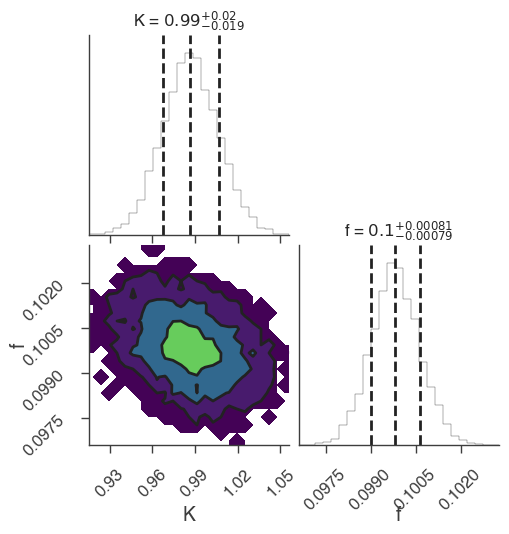

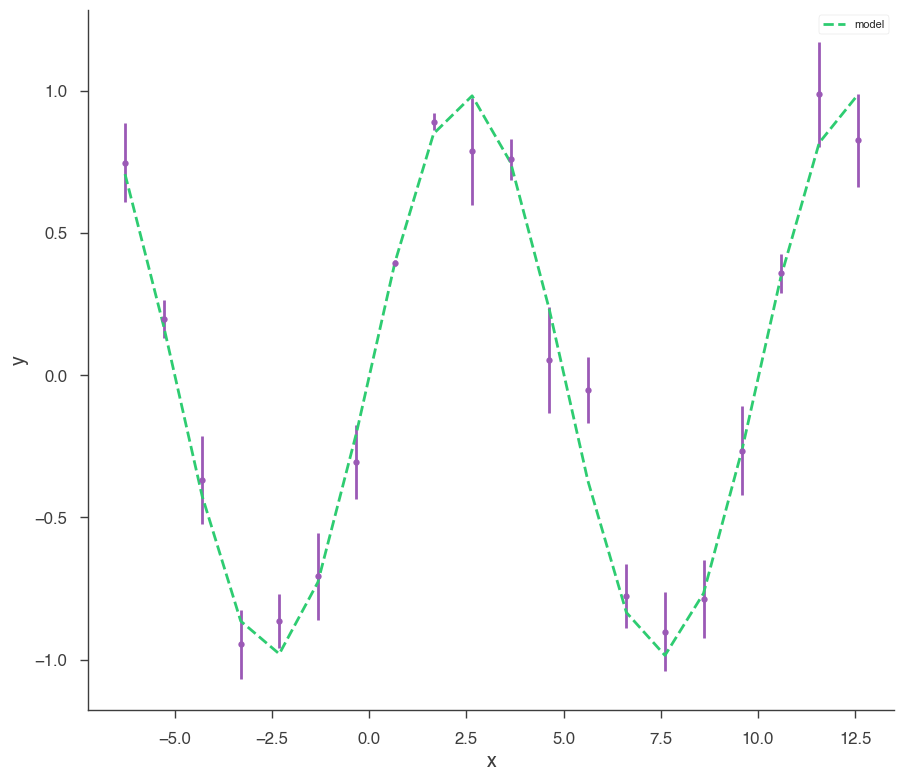

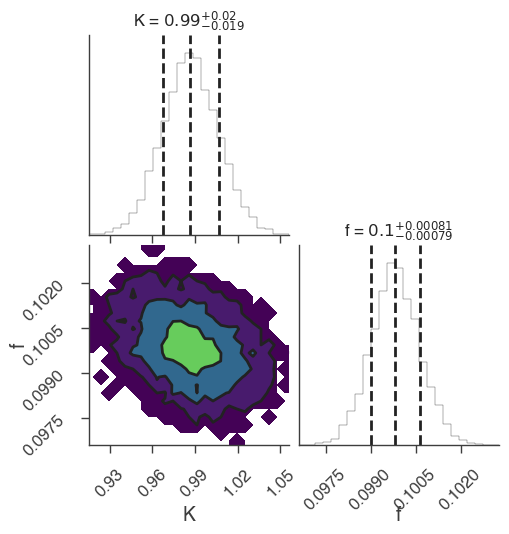

In [8]:
bayes_analysis.set_sampler("dynesty_dynamic")
bayes_analysis.sampler.setup(
    stop_function=dynesty.utils.old_stopping_function, n_effective=None
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## zeus

21:45:38 INFO      sampler set to zeus                                                     ]8;id=80622;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=879426;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

The run method has been deprecated and it will be removed. Please use the new run_mcmc method.


Initialising ensemble of 20 walkers...


Sampling progress :   0%|          | 0/625 [00:00<?, ?it/s]

Sampling progress :   1%|          | 5/625 [00:00<00:13, 45.40it/s]

Sampling progress :   2%|▏         | 10/625 [00:00<00:14, 43.71it/s]

Sampling progress :   2%|▏         | 15/625 [00:00<00:13, 44.03it/s]

Sampling progress :   3%|▎         | 20/625 [00:00<00:13, 46.13it/s]

Sampling progress :   4%|▍         | 26/625 [00:00<00:12, 48.85it/s]

Sampling progress :   5%|▌         | 32/625 [00:00<00:11, 51.13it/s]

Sampling progress :   6%|▌         | 39/625 [00:00<00:10, 54.73it/s]

Sampling progress :   7%|▋         | 45/625 [00:00<00:10, 55.57it/s]

Sampling progress :   8%|▊         | 51/625 [00:00<00:10, 56.57it/s]

Sampling progress :   9%|▉         | 57/625 [00:01<00:10, 56.09it/s]

Sampling progress :  10%|█         | 63/625 [00:01<00:09, 57.10it/s]

Sampling progress :  11%|█         | 69/625 [00:01<00:10, 54.16it/s]

Sampling progress :  12%|█▏        | 75/625 [00:01<00:10, 51.47it/s]

Sampling progress :  13%|█▎        | 81/625 [00:01<00:12, 45.11it/s]

Sampling progress :  14%|█▍        | 87/625 [00:01<00:11, 47.14it/s]

Sampling progress :  15%|█▍        | 93/625 [00:01<00:10, 48.81it/s]

Sampling progress :  16%|█▌        | 99/625 [00:01<00:10, 50.30it/s]

Sampling progress :  17%|█▋        | 105/625 [00:02<00:10, 50.85it/s]

Sampling progress :  18%|█▊        | 112/625 [00:02<00:09, 54.01it/s]

Sampling progress :  19%|█▉        | 118/625 [00:02<00:09, 54.84it/s]

Sampling progress :  20%|██        | 125/625 [00:02<00:08, 57.58it/s]

Sampling progress :  21%|██        | 131/625 [00:02<00:08, 57.11it/s]

Sampling progress :  22%|██▏       | 138/625 [00:02<00:08, 60.04it/s]

Sampling progress :  23%|██▎       | 145/625 [00:02<00:08, 57.96it/s]

Sampling progress :  24%|██▍       | 151/625 [00:02<00:08, 56.80it/s]

Sampling progress :  25%|██▌       | 157/625 [00:02<00:08, 55.41it/s]

Sampling progress :  26%|██▌       | 163/625 [00:03<00:08, 54.44it/s]

Sampling progress :  27%|██▋       | 170/625 [00:03<00:07, 57.37it/s]

Sampling progress :  28%|██▊       | 176/625 [00:03<00:08, 54.74it/s]

Sampling progress :  29%|██▉       | 182/625 [00:03<00:08, 54.46it/s]

Sampling progress :  30%|███       | 188/625 [00:03<00:08, 49.17it/s]

Sampling progress :  31%|███       | 194/625 [00:03<00:09, 47.38it/s]

Sampling progress :  32%|███▏      | 200/625 [00:03<00:08, 49.61it/s]

Sampling progress :  33%|███▎      | 206/625 [00:03<00:08, 50.48it/s]

Sampling progress :  34%|███▍      | 212/625 [00:04<00:07, 52.03it/s]

Sampling progress :  35%|███▍      | 218/625 [00:04<00:07, 53.48it/s]

Sampling progress :  36%|███▌      | 224/625 [00:04<00:07, 52.80it/s]

Sampling progress :  37%|███▋      | 230/625 [00:04<00:08, 47.86it/s]

Sampling progress :  38%|███▊      | 235/625 [00:04<00:08, 48.29it/s]

Sampling progress :  38%|███▊      | 240/625 [00:04<00:08, 47.15it/s]

Sampling progress :  39%|███▉      | 245/625 [00:04<00:08, 46.35it/s]

Sampling progress :  40%|████      | 251/625 [00:04<00:07, 48.09it/s]

Sampling progress :  41%|████      | 256/625 [00:04<00:07, 47.29it/s]

Sampling progress :  42%|████▏     | 262/625 [00:05<00:07, 49.21it/s]

Sampling progress :  43%|████▎     | 267/625 [00:05<00:07, 47.51it/s]

Sampling progress :  44%|████▎     | 273/625 [00:05<00:07, 49.56it/s]

Sampling progress :  45%|████▍     | 279/625 [00:05<00:06, 51.61it/s]

Sampling progress :  46%|████▌     | 285/625 [00:05<00:06, 50.58it/s]

Sampling progress :  47%|████▋     | 291/625 [00:05<00:06, 52.20it/s]

Sampling progress :  48%|████▊     | 297/625 [00:05<00:06, 51.76it/s]

Sampling progress :  48%|████▊     | 303/625 [00:05<00:06, 52.53it/s]

Sampling progress :  49%|████▉     | 309/625 [00:05<00:06, 51.82it/s]

Sampling progress :  50%|█████     | 315/625 [00:06<00:05, 52.59it/s]

Sampling progress :  51%|█████▏    | 321/625 [00:06<00:05, 53.09it/s]

Sampling progress :  52%|█████▏    | 327/625 [00:06<00:05, 52.56it/s]

Sampling progress :  53%|█████▎    | 334/625 [00:06<00:05, 55.68it/s]

Sampling progress :  54%|█████▍    | 340/625 [00:06<00:05, 54.52it/s]

Sampling progress :  55%|█████▌    | 346/625 [00:06<00:05, 53.58it/s]

Sampling progress :  56%|█████▋    | 352/625 [00:06<00:05, 51.58it/s]

Sampling progress :  57%|█████▋    | 358/625 [00:06<00:05, 51.48it/s]

Sampling progress :  58%|█████▊    | 364/625 [00:07<00:04, 53.75it/s]

Sampling progress :  59%|█████▉    | 370/625 [00:07<00:04, 54.61it/s]

Sampling progress :  60%|██████    | 377/625 [00:07<00:04, 58.03it/s]

Sampling progress :  61%|██████▏   | 383/625 [00:07<00:04, 56.27it/s]

Sampling progress :  62%|██████▏   | 390/625 [00:07<00:04, 58.11it/s]

Sampling progress :  64%|██████▎   | 397/625 [00:07<00:03, 60.45it/s]

Sampling progress :  65%|██████▍   | 404/625 [00:07<00:03, 58.83it/s]

Sampling progress :  66%|██████▌   | 410/625 [00:07<00:03, 57.74it/s]

Sampling progress :  67%|██████▋   | 416/625 [00:07<00:03, 53.62it/s]

Sampling progress :  68%|██████▊   | 422/625 [00:08<00:03, 53.28it/s]

Sampling progress :  68%|██████▊   | 428/625 [00:08<00:03, 54.81it/s]

Sampling progress :  69%|██████▉   | 434/625 [00:08<00:03, 53.84it/s]

Sampling progress :  71%|███████   | 441/625 [00:08<00:03, 56.13it/s]

Sampling progress :  72%|███████▏  | 447/625 [00:08<00:03, 55.62it/s]

Sampling progress :  72%|███████▏  | 453/625 [00:08<00:03, 56.81it/s]

Sampling progress :  73%|███████▎  | 459/625 [00:08<00:02, 57.62it/s]

Sampling progress :  75%|███████▍  | 466/625 [00:08<00:02, 59.54it/s]

Sampling progress :  76%|███████▌  | 473/625 [00:08<00:02, 61.03it/s]

Sampling progress :  77%|███████▋  | 480/625 [00:09<00:02, 55.69it/s]

Sampling progress :  78%|███████▊  | 486/625 [00:09<00:02, 53.87it/s]

Sampling progress :  79%|███████▊  | 492/625 [00:09<00:02, 53.45it/s]

Sampling progress :  80%|███████▉  | 498/625 [00:09<00:02, 53.26it/s]

Sampling progress :  81%|████████  | 504/625 [00:09<00:02, 51.71it/s]

Sampling progress :  82%|████████▏ | 510/625 [00:09<00:02, 50.13it/s]

Sampling progress :  83%|████████▎ | 516/625 [00:09<00:02, 48.95it/s]

Sampling progress :  83%|████████▎ | 521/625 [00:09<00:02, 45.44it/s]

Sampling progress :  84%|████████▍ | 527/625 [00:10<00:02, 48.51it/s]

Sampling progress :  86%|████████▌ | 535/625 [00:10<00:01, 54.80it/s]

Sampling progress :  87%|████████▋ | 541/625 [00:10<00:01, 55.01it/s]

Sampling progress :  88%|████████▊ | 547/625 [00:10<00:01, 55.66it/s]

Sampling progress :  89%|████████▊ | 554/625 [00:10<00:01, 58.60it/s]

Sampling progress :  90%|████████▉ | 561/625 [00:10<00:01, 61.16it/s]

Sampling progress :  91%|█████████ | 568/625 [00:10<00:00, 61.52it/s]

Sampling progress :  92%|█████████▏| 575/625 [00:10<00:00, 61.38it/s]

Sampling progress :  93%|█████████▎| 582/625 [00:10<00:00, 57.48it/s]

Sampling progress :  94%|█████████▍| 588/625 [00:11<00:00, 52.41it/s]

Sampling progress :  95%|█████████▌| 594/625 [00:11<00:00, 50.96it/s]

Sampling progress :  96%|█████████▌| 600/625 [00:11<00:00, 49.66it/s]

Sampling progress :  97%|█████████▋| 606/625 [00:11<00:00, 48.97it/s]

Sampling progress :  98%|█████████▊| 611/625 [00:11<00:00, 45.84it/s]

Sampling progress :  99%|█████████▊| 616/625 [00:11<00:00, 44.54it/s]

Sampling progress :  99%|█████████▉| 621/625 [00:11<00:00, 45.22it/s]

Sampling progress : 100%|██████████| 625/625 [00:11<00:00, 52.59it/s]

21:45:50 INFO      fit restored to maximum of posterior                                         ]8;id=117249;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=725528;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=167660;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=399798;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Summary


-------


Number of Generations: 625


Number of Parameters: 2


Number of Walkers: 20


Number of Tuning Generations: 20


Scale Factor: 0.911988


Mean Integrated Autocorrelation Time: 3.0


Effective Sample Size: 4170.28


Number of Log Probability Evaluations: 67304


Effective Samples per Log Probability Evaluation: 0.061962


None


Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.87 -0.19 +0.20) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.98 +/- 0.08) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-8.540823
total,-8.540823


Values of statistical measures:

,statistical measures
AIC,21.787528
BIC,23.073110
DIC,21.183635
PDIC,2.050997


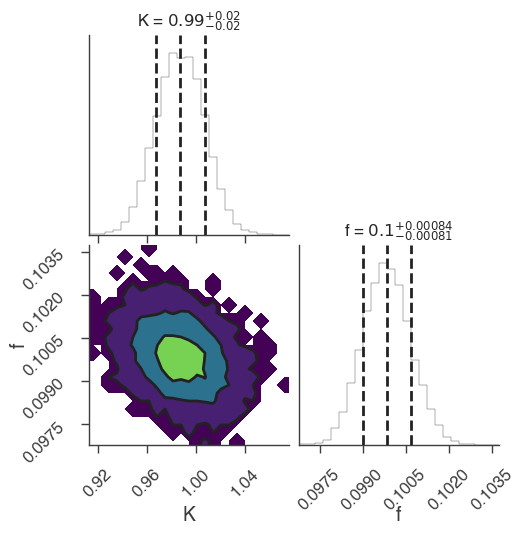

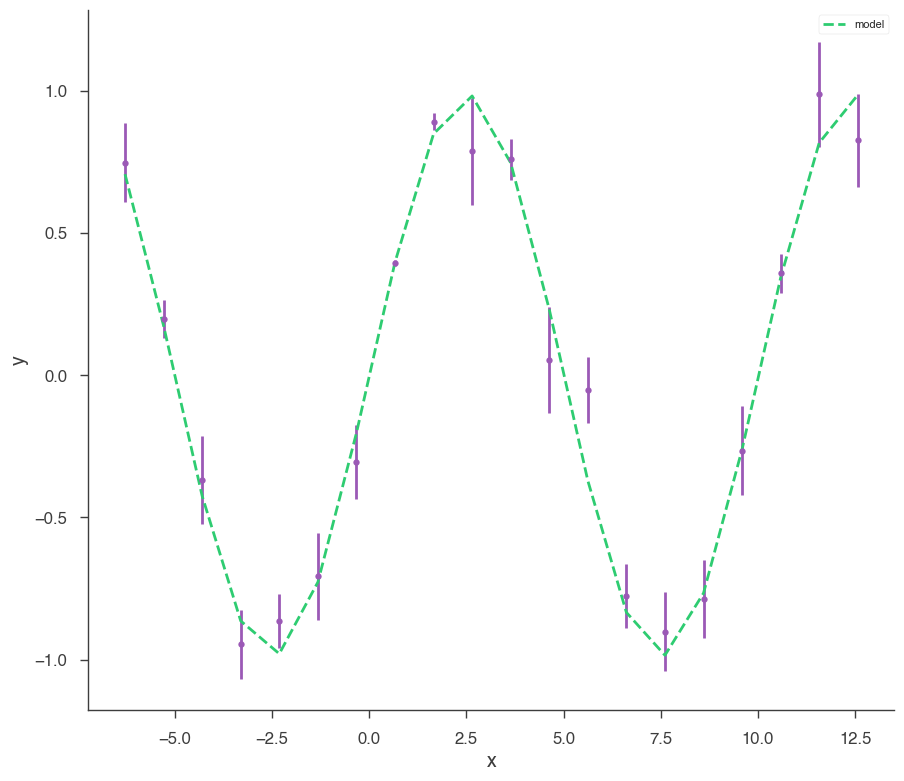

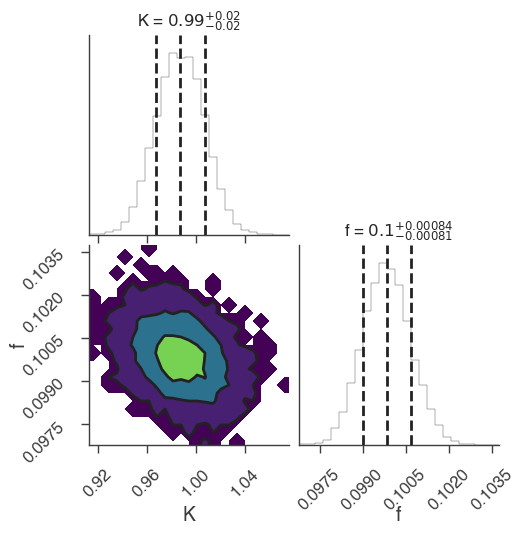

In [9]:
bayes_analysis.set_sampler("zeus")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## ultranest

21:45:51 INFO      sampler set to ultranest                                                ]8;id=65079;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=334747;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-9  


[ultranest] Likelihood function evaluations: 5791


[ultranest]   logZ = -17.29 +- 0.1097


[ultranest] Effective samples strategy satisfied (ESS = 993.2, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.05 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.42, need <0.5)


[ultranest]   logZ error budget: single: 0.14 bs:0.11 tail:0.41 total:0.42 required:<0.50


[ultranest] done iterating.


21:45:59 INFO      fit restored to maximum of posterior                                         ]8;id=137132;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=781089;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=267712;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=328062;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.89 -0.23 +0.19) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.98 +/- 0.08) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-8.542882
total,-8.542882


Values of statistical measures:

,statistical measures
AIC,21.791647
BIC,23.077229
DIC,21.314713
PDIC,2.116402
log(Z),-7.527737


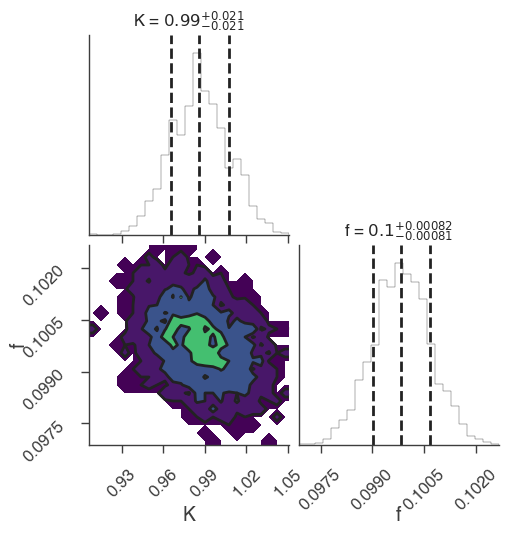

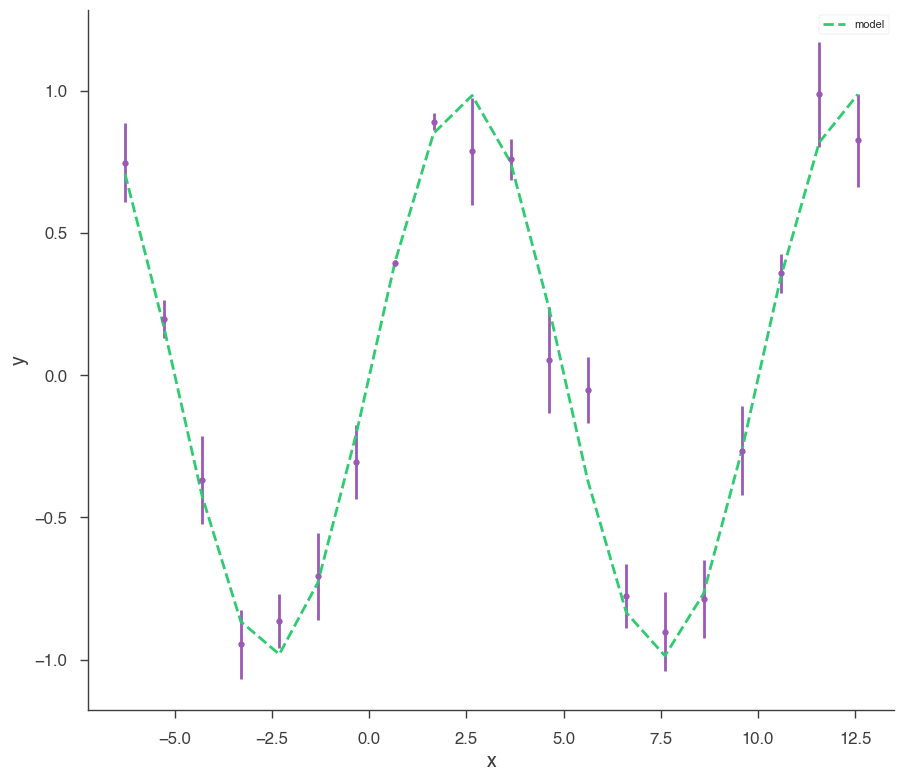

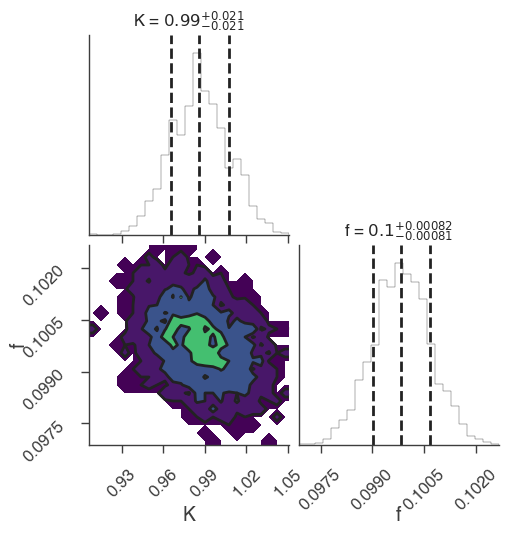

In [10]:
bayes_analysis.set_sampler("ultranest")
bayes_analysis.sampler.setup(
    min_num_live_points=400, frac_remain=0.5, use_mlfriends=False
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()